# Predictive Modeling

In [1]:
import pandas as pd
import sqlite3 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#reads movies table from database file into a dataframe 
pathway = "C:/Users/sarns/Desktop/Personal_Proj/Movies_ETL/movies_etl_db.db"
conn = sqlite3.connect(pathway)
df = pd.read_sql_query("SELECT * from movies", conn)
df.head()

,timestamp,movie_title,year,length,rotten_tomatoes,IMDb,video_ID,source
0,01/04/2023 12:43:09AM,Rush Hour,1998,1h 38m,61%,7.0/10,FB7SfJb4xB8,API
1,01/04/2023 12:43:11AM,Rush Hour 2,2001,1h 30m,51%,6.6/10,eeJySF7u4VA,API
2,01/04/2023 12:44:20AM,X-Men,2000,1h 44m,82%,7.3/10,FOjS4mVKFTw,API
3,01/04/2023 12:44:25AM,American Pie,1999,1h 35m,61%,7.0/10,VoFSo5c20eM,API
4,01/04/2023 12:44:35AM,Rocky,1976,2h 0m,91%,8.1/10,UTIWq-SG2w4,API


### Clean and Transforms data from string to float

In [3]:
# drop rows with missing rotten tomato score
df =df[df.rotten_tomatoes != 'NA']

In [4]:
#changes rotten tomatoes column from string type percentage to float type percentage
df['rotten_tomatoes'] = df['rotten_tomatoes'].str.rstrip('%').astype(float)/100 

In [5]:
#changes rotten tomatoes column from string type percentage to float type percentage
df['IMDb'] = df['IMDb'].str.rstrip('/10').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        69 non-null     object 
 1   movie_title      69 non-null     object 
 2   year             69 non-null     object 
 3   length           69 non-null     object 
 4   rotten_tomatoes  69 non-null     float64
 5   IMDb             69 non-null     float64
 6   video_ID         69 non-null     object 
 7   source           69 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.9+ KB


### Linear Regression

In [7]:
# correlation coefficient of > 0.7 is considered highly correlated
corr = df['rotten_tomatoes'].corr(df['IMDb'])
corr

0.7220008469409231

In [8]:
# split the columns into test and training datasets, where the test dataset consists of 30% of the total dataset. 
x_train, x_test, y_train, y_test = train_test_split(
df[['IMDb']], df[['rotten_tomatoes']], 
test_size=0.33, random_state=42) #random_state - if set to an integer value, the shuffling can be reproduced. Otherwise, the shuffling is random

In [9]:
# Creates a LinearRegression object, and then fit the training dataset to the model.
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [10]:
# Score the model using the test dataset.
# 0.37 is a moderate score; we can say that 9% of the variance is explained. 
linearModel.score(x_test, y_test)

0.3701258309689126

In [11]:
#creates predicted rotten tomato scores based on x (IMDb) test dataset
y_predicted = linearModel.predict(x_test)
y_predicted

array([[ 0.46589069],
       [ 0.62721015],
       [ 0.76836468],
       [ 0.82885947],
       [ 0.54655042],
       [ 0.62721015],
       [ 0.86918934],
       [ 0.62721015],
       [ 0.82885947],
       [ 0.46589069],
       [ 0.38523096],
       [ 0.22391151],
       [ 0.82885947],
       [ 0.54655042],
       [ 0.30457124],
       [ 0.66754002],
       [ 0.42556083],
       [ 0.66754002],
       [-0.219717  ],
       [ 0.94984907],
       [ 0.66754002],
       [ 0.56671536],
       [ 0.38523096]])

In [12]:
#store predicted rotten tomato scores as a column
predicted_RT = pd.DataFrame(y_predicted,columns=['predicted_RT'])
predicted_RT.head()

,predicted_RT
0,0.465891
1,0.627210
2,0.768365
3,0.828859
4,0.546550


In [13]:
# Join the y_test and predicted data with the x_test data, save the joined data in a new DataFrame, 
combined = predicted_RT.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])
combined.head()

,predicted_RT,IMDb,rotten_tomatoes
0,0.465891,6.2,0.89
1,0.627210,7.0,0.61
2,0.768365,7.7,0.73
3,0.828859,8.0,0.91
4,0.546550,6.6,0.67


In [14]:
#10. Melt the actual and predicted price columns together, assigning appropriate values to the variable and value names.
melted = pd.melt(combined, id_vars=['IMDb'], 
value_vars=['rotten_tomatoes','predicted_RT'], 
var_name='Rotten Tomatoes',
value_name='RT_score')
melted

,IMDb,Rotten Tomatoes,RT_score
0,6.2,rotten_tomatoes,0.890000
1,7.0,rotten_tomatoes,0.610000
2,7.7,rotten_tomatoes,0.730000
3,8.0,rotten_tomatoes,0.910000
4,6.6,rotten_tomatoes,0.670000
5,7.0,rotten_tomatoes,0.540000
6,8.2,rotten_tomatoes,0.990000
7,7.0,rotten_tomatoes,0.850000
8,8.0,rotten_tomatoes,0.840000
9,6.2,rotten_tomatoes,0.160000


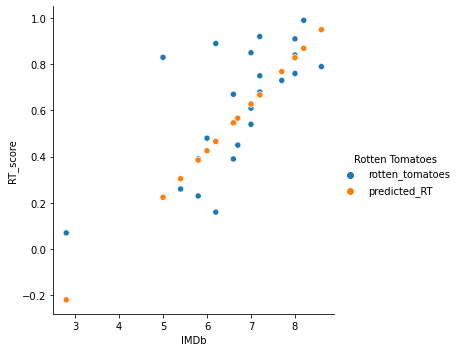

In [15]:
# Use a Seaborn line plot without a confidence interval to plot the predicted data.
sns.relplot(data=melted, x='IMDb', y='RT_score', 
hue='Rotten Tomatoes')

## Hypothesis Testing

In [16]:
#H0: There is no relationship between IMDb and Rotten Tomatoe scores   B = 0
#HA: There is a relationship  between IMDb and Rotten Tomatoe scores   B != 0 
#Two tailed test

In [17]:
import statsmodels.formula.api as smf

In [18]:
#displays summary table for hypothesis test for linear regression 
lr = smf.ols(formula = "rotten_tomatoes ~ IMDb", data=df).fit()
lr.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.6098,0.140,-4.367,0.000,-0.889,-0.331
IMDb,0.1778,0.021,8.542,0.000,0.136,0.219


In [19]:
# t stats = 8.542 standard deviation that predicted Y is from the mean. 
#  8.542 > 1.96 so reject the null hypthesis and say that there is a relationship. 
# small p value so reject the null hypthesis and say that there is a relationship. 

In [20]:
conn.close()